# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy

## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1 (4pt)
What was the mean finishing time in the random sample?

In [3]:
df = pd.read_csv("run10sample.csv")
print("The mean finishing time in the sample dataset was " + str(df['time'].mean()) + " minutes")
df

The mean finishing time in the sample dataset was 98.1504 minutes


,Unnamed: 0,Unnamed: 0.1,place,time,pace,age,gender,location,state,divPlace,divTot
0,0,0,4494,92.25,9.225,38.0,M,Chesapeake Beach MD,MD,690.0,1093.0
1,1,1,6298,106.35,10.635,33.0,M,Washington DC,DC,1322.0,1490.0
2,2,2,2502,89.33,8.933,55.0,F,McLean VA,VA,37.0,236.0
3,3,3,8176,113.50,11.350,24.0,F,Alexandria VA,VA,878.0,974.0
4,4,4,3413,86.52,8.652,54.0,M,San Francisco CA,CA,213.0,483.0
5,5,5,8008,112.30,11.230,42.0,F,Chevy Chase MD,MD,785.0,974.0
6,6,6,8791,118.45,11.845,36.0,F,Fairfax VA,VA,1215.0,1367.0
7,7,7,3987,95.17,9.517,25.0,F,Arlington VA,VA,1230.0,2782.0
8,8,8,3451,93.25,9.325,25.0,F,Philadelphia PA,PA,1074.0,2782.0
9,9,9,1046,72.37,7.237,43.0,M,Pasadena MD,MD,111.0,931.0


### Question 2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [4]:
df.groupby(['gender']).size()

gender
F    14
M    11
dtype: int64

### Question 3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [5]:
df[['gender','time']].groupby('gender').mean()

,time
gender,
F,103.496429
M,91.346364


## Task 2: Resampling from the population (47 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [89]:
dfwhole = pd.read_csv('run10.csv')
proportion = df['time'].mean()/dfwhole['time'].mean()
print("The mean finishing time in the total dataset was " + str(dfwhole['time'].mean()) + " minutes, compared to the mean finishing time in the sample dataset, " + str(df['time'].mean()) + " minutes")
print("This is a difference of " + str(dfwhole['time'].mean() - df['time'].mean()) + " minutes.")
print("The mean of the sample dataset is " + str((proportion-1)*100) + "% greater than the mean of the whole.")

The mean finishing time in the total dataset was 94.51597470897607 minutes, compared to the mean finishing time in the sample dataset, 98.1504 minutes
This is a difference of -3.6344252910239305 minutes.
The mean of the sample dataset is 3.84530266149683% greater than the mean of the whole.


Text(0.5, 1.0, 'Total Gender Count')

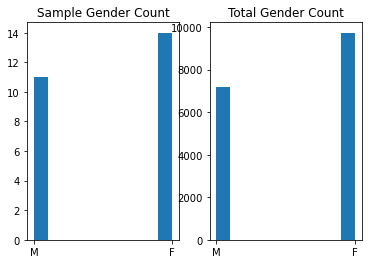

In [7]:
plt.subplot(1, 2, 1)
plt.hist(df['gender'])
plt.title("Sample Gender Count")
plt.subplot(1, 2, 2)
plt.hist(dfwhole['gender'])
plt.title("Total Gender Count")

Histograms of male and female runners in the sample and total runner datasets.

In [8]:
samplegender = df['gender'].value_counts(normalize = True)
totalgender = dfwhole['gender'].value_counts(normalize = True)
samplegender, totalgender

(F    0.56
 M    0.44
 Name: gender, dtype: float64,
 F    0.575075
 M    0.424925
 Name: gender, dtype: float64)

Normalized gender distribution between the sample and total datasets.

(0.0, 80.0)

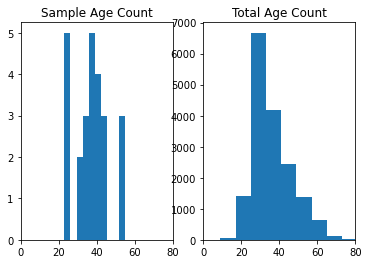

In [9]:
plt.subplot(1, 2, 1)
plt.hist(df['age'])
plt.title("Sample Age Count")
plt.xlim(xmin = 0, xmax = 80)
plt.subplot(1, 2, 2)
plt.hist(dfwhole['age'])
plt.title("Total Age Count")
plt.xlim(xmin = 0, xmax = 80)

Histograms of runners ages and their count in the sample and total runner datasets.

The mean finishing time in the total dataset was 94.51597470897607 minutes, compared to the mean finishing time in the sample dataset, 98.1504 minutes. The sample mean is about 3.6 minutes slower than the total dataset. We now look at the gender and age distribution to find what may have caused this.

We see that the gender distribution in the sample reflects the whole population well. The histograms look similar, and analyzing normalized values show us that the gender distribution is within 2% of the population. This is unlikely to have been what caused the difference.

Looking at the age distribution, we see that there are several outliers that contribute to modes not present in the greater population sample. There are a high proportion of older runners from the late 30s to 50s that are not proportionate to the whole population. Additionally there is a gap of runners in their late 20s to 30s that are not there in the sample population. This is likely what caused the discrepancy between the two average run times.

We could've improved our sample estimate by selecting a sample population that better reflects the ages of the greater population. Calculating the median age and selecting a normal distribution from there would give us a better distribution.

### Question 2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistics


In [10]:
def bootstrap(data, N, fcn = np.mean, numIter = 1000):
    array = np.zeros((1, numIter))
    """
    Args:
    data (np.ndarray) - input data
    N (int) - sample size for 1 iteration
    fcn (function object) - function to be applied
    numIter (int) - number of resamples/iterations
    
    Output:
    array (np.ndarray) - containing the 
    """
    
    for i in range(numIter):
        #One iteration of N sample size from data
        samples = np.random.choice(data, size = N, replace = True)
        #Adding samples to output array
        array[:, i] = fcn(samples)
    
    return array

### Question 3 (8pt)
Call the resample (bootstrap) function from Question 2 with time from the whole population as the data series, mean as the statistic, and a sample size of 25. Plot a histogram of the samples – make sure your x-axis and y-axis are labeled. Report the mean and the standard deviation of the resampled estimates. 

In [33]:
dfwhole_means = bootstrap(dfwhole['time'], N = 25, fcn = np.mean, numIter =1000)
print(dfwhole_means)

[[ 89.3632  94.7124 100.0632  89.8396  88.5372  93.302   93.7956  97.5092
   97.6228  90.14    89.3344  92.8656  91.606   93.1976  94.6264  93.696
   94.6832  97.7556  95.0488  94.046   89.5244  98.3608  93.7168  96.564
   96.3864  95.0452  88.2876  92.0828  99.2476  90.8664  90.7704  95.8148
   96.9904 101.208  101.7924  88.97    94.104   89.6576  90.6612  94.7412
   90.2596  95.234   93.3728  93.7948  89.2412  97.3924  97.5396  99.4148
   98.3604  93.9232  95.2112  97.59    96.3532  96.5644  94.4656  95.2252
   94.2492  94.3324  93.4872  93.86    97.66    95.7748  91.932   96.4068
   92.7736  94.07    85.8752  94.82    89.462   98.2908  92.5728  96.4956
  102.728   90.8152  90.8248  94.9796  94.4952 100.0784  88.836   95.15
   93.0476  96.6128  98.6624  92.2512  97.5328  96.6948  95.222   91.6008
   90.4364  93.3636  97.4844  91.2272  88.1592  98.2704  92.3688  96.5848
   97.2056  98.92    88.5016  96.2776  93.488   92.818   97.758   98.0724
   93.858   91.9748  94.872   95.2212  91.

<function matplotlib.pyplot.show(close=None, block=None)>

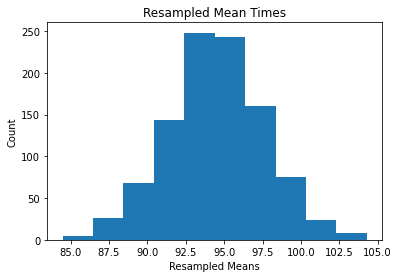

In [36]:
plt.hist(dfwhole_means[0,:])
plt.xlabel("Resampled Means")
plt.ylabel("Count")
plt.title("Resampled Mean Times")
plt.show

In [25]:
mean_dfm = np.mean(dfwhole_means)
std_dfm = np.std(dfwhole_means)
print("The mean of the resampled estimates is " + str(mean_dfm) + " minutes and the standard deviation is " + str(std_dfm))

The mean of the resampled estimates is 94.44445999999999 minutes and the standard deviation is 3.2405912117760245


### Question 4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the means distribution changes most and why? 

In [29]:
#Sample size 50
dfwhole_50 = bootstrap(dfwhole['time'], N = 50, fcn = np.mean, numIter =1000)
mean_dfm50 = np.mean(dfwhole_50)
std_dfm50 = np.std(dfwhole_50)
print("Mean: " + str(mean_dfm50) + ", Standard Deviation: " + str(std_dfm50))

Mean: 94.5151644, Standard Deviation: 2.266712025611688


In [30]:
#Sample size 100
dfwhole_100 = bootstrap(dfwhole['time'], N = 100, fcn = np.mean, numIter =1000)
mean_dfm100 = np.mean(dfwhole_100)
std_dfm100 = np.std(dfwhole_100)
print("Mean: " + str(mean_dfm100) + ", Standard Deviation: " + str(std_dfm100))

Mean: 94.41171970000002, Standard Deviation: 1.5580363361044918


The mean value does not change very much as the sample size increases. However, the standard deviation goes down noticeably. This is because the standard deviation represents the variance/ dispersion of the set of results. As the sample size increases, we have a greater number of datapoints that will fit the normal distribution and the effects of outliers in the variation will be decreased, leading to a lower standard deviation

### Question 5 (6pt)
Calculate the predicted standard error of the mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [31]:
#Sample size 25
se25 = std_dfm / np.sqrt(25)
print("The standard error for sample size 25 is " + str(se25))
#Sample size 50
se50 = std_dfm50 / np.sqrt(50)
print("The standard error for sample size 50 is " + str(se50))
#Sample size 25
se100 = std_dfm100 / np.sqrt(100)
print("The standard error for sample size 100 is " + str(se100))

The standard error for sample size 25 is 0.6481182423552049
The standard error for sample size 50 is 0.32056148886142394
The standard error for sample size 100 is 0.1558036336104492


We see the standard errors decreasing as the sample size increases. This matches with what we expected from the standard deviation values calculated in the last question

## Task 3: Calculating confidence intervals (24pt) 
### Question 1 (8pt)
Write a function (confidenceInt) that determines a confidence interval for a data series. 	

Input arguments 
- data: Sample of estimates – usually this is output from “bootstrap” (resample function from task 3 Q2)
- prec: What Confidence interval in percept? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [53]:
def confidenceInt(data, prec = 95):
    '''
    Args:
    data (ndarray) - input data
    prec (int) - confidence interval
    Returns:
    List
    '''
    bounds = []
    mean = np.mean(data)
    confIntLower = np.percentile(data, ((100-prec)/2))
    confIntUpper = np.percentile(data, ((100+prec)/2))
    bounds.append(confIntLower)
    bounds.append(confIntUpper)
    return bounds
    

### Question 2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25. Use your bootstrap function (resample from Task 3 Q2) above to generate 1000 artificial samples of 25. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [79]:
dfwhole25 = bootstrap(dfwhole['time'], N = 25, fcn = np.mean, numIter =1000)
confInt25 = confidenceInt(dfwhole25)
confInt25

[88.49568999999998, 100.45726000000002]

### Question 3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

<function matplotlib.pyplot.show(close=None, block=None)>

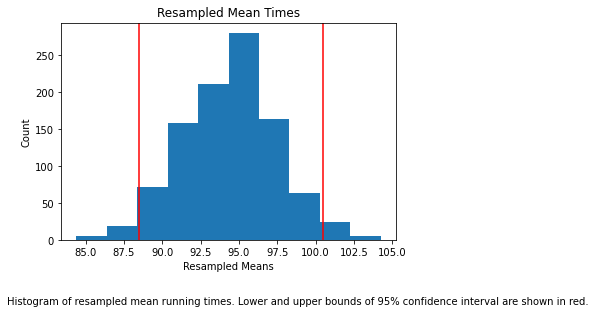

In [80]:
plt.hist(dfwhole25[0,:])
plt.xlabel("Resampled Means")
plt.ylabel("Count")
plt.title("Resampled Mean Times")
plt.axvline(x = confInt25[0], color = 'r')
plt.axvline(x = confInt25[1], color = 'r')
plt.figtext(0,-0.1,"Histogram of resampled mean running times. Lower and upper bounds of 95% confidence interval are shown in red.")
plt.show

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 1 (8pt)
Load the sample stored in run10sample.csv. Now call the resample function with that time data, in each loop resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [81]:
dfsample25 = bootstrap(df['time'], N = 25, fcn = np.mean, numIter =1000)
mean_dfs25 = np.mean(dfsample25)
std_dfs25 = np.std(dfsample25)
confIntSample25 = confidenceInt(dfsample25)
print("Mean: " + str(mean_dfs25) + ", Standard Deviation: " + str(std_dfs25))
print("95% Confidence Interval Bounds: " + str(confIntSample25))

Mean: 98.07098799999999, Standard Deviation: 2.859489105056356
95% Confidence Interval Bounds: [92.74269999999999, 104.1657]


### Question 2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels. 

<function matplotlib.pyplot.show(close=None, block=None)>

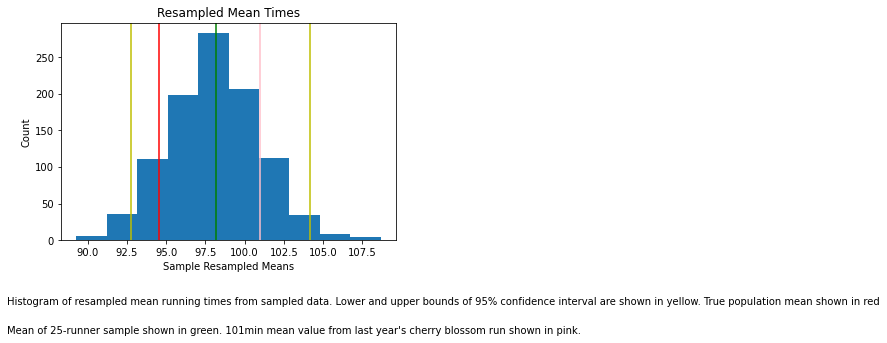

In [86]:
plt.hist(dfsample25[0,:])
plt.xlabel("Sample Resampled Means")
plt.ylabel("Count")
plt.title("Resampled Mean Times")
plt.axvline(x = confIntSample25[0], color = 'y')
plt.axvline(x = confIntSample25[1], color = 'y')
plt.axvline(x = np.mean(dfwhole['time']), color = 'r')
plt.axvline(x = np.mean(df['time']), color = 'g')
plt.axvline(x = 101, color = 'pink')
plt.figtext(0,-0.1,"Histogram of resampled mean running times from sampled data. Lower and upper bounds of 95% confidence interval are shown in yellow. True population mean shown in red")
plt.figtext(0,-0.2,"Mean of 25-runner sample shown in green. 101min mean value from last year's cherry blossom run shown in pink.")
plt.show

### Question 3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

The true population mean lies within the lower and upper bounds of the 95% confidence interval of the 25-person sample. 

92.74269999999999 < 94.51597470897607 < 104.1657

It also includes the mean value (101m) from last year's run. 

92.74269999999999 < 101 < 104.1657

When comparing the mean value times between this sample and last year's 101 minutes measure, it would appear that the mean race time has decreased.

98.1504 < 101